## WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luanda
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | bandipura
Processing Record 4 of Set 1 | prince rupert
Processing Record 5 of Set 1 | fort bragg
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | papao
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | queenstown
Processing Record 12 of Set 1 | conduaga
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | chagoda
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | lompoc
Processing Record 19 of Set 1 | lethem
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | praia
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of S

Processing Record 39 of Set 4 | rzhev
Processing Record 40 of Set 4 | am djarass
City not found. Skipping...
Processing Record 41 of Set 4 | beberibe
Processing Record 42 of Set 4 | tortosa
Processing Record 43 of Set 4 | puerto ayora
Processing Record 44 of Set 4 | nikolayevsk-on-amure
Processing Record 45 of Set 4 | mobaye
Processing Record 46 of Set 4 | inari
Processing Record 47 of Set 4 | kingston
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | oranjemund
Processing Record 0 of Set 5 | bontang
Processing Record 1 of Set 5 | les cayes
Processing Record 2 of Set 5 | wynyard
Processing Record 3 of Set 5 | sabzevar
Processing Record 4 of Set 5 | vezirkopru
Processing Record 5 of Set 5 | tuy hoa
Processing Record 6 of Set 5 | miracema do tocantins
Processing Record 7 of Set 5 | minas de marcona
Processing Record 8 of Set 5 | arraial do cabo
Processing Record 9 of Set 5 | panjakent
Processing Record 10 of Set 5 | tacoronte
Processing Record 11 of Set 5 | coahuaya

Processing Record 31 of Set 8 | axim
Processing Record 32 of Set 8 | amalapuram
Processing Record 33 of Set 8 | yaren
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | palikir - national government center
Processing Record 36 of Set 8 | chinju
Processing Record 37 of Set 8 | turkestan
Processing Record 38 of Set 8 | hailey
Processing Record 39 of Set 8 | knyaze-volkonskoye
Processing Record 40 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 41 of Set 8 | mersing
Processing Record 42 of Set 8 | wladyslawowo
Processing Record 43 of Set 8 | betio village
Processing Record 44 of Set 8 | guerrero negro
Processing Record 45 of Set 8 | selfoss
Processing Record 46 of Set 8 | kailua-kona
Processing Record 47 of Set 8 | bemetara
Processing Record 48 of Set 8 | oum hadjer
Processing Record 49 of Set 8 | codrington
Processing Record 0 of Set 9 | keflavik
Processing Record 1 of Set 9 | mahibadhoo
Processing Record 2 of Set 9 | tanout
Processing Record 3 of S

Processing Record 20 of Set 12 | cable beach
City not found. Skipping...
Processing Record 21 of Set 12 | freeport
Processing Record 22 of Set 12 | sankt leon-rot
Processing Record 23 of Set 12 | santos reyes nopala
Processing Record 24 of Set 12 | yarmouth
Processing Record 25 of Set 12 | dumai
Processing Record 26 of Set 12 | nadi
Processing Record 27 of Set 12 | east honolulu
City not found. Skipping...
Processing Record 28 of Set 12 | zimmerman
Processing Record 29 of Set 12 | kitimat
Processing Record 30 of Set 12 | vila velha
Processing Record 31 of Set 12 | sandnessjoen
Processing Record 32 of Set 12 | klyuchi
Processing Record 33 of Set 12 | byerazino
Processing Record 34 of Set 12 | naze
Processing Record 35 of Set 12 | nantucket
Processing Record 36 of Set 12 | zouila
Processing Record 37 of Set 12 | moyale
Processing Record 38 of Set 12 | linhares
Processing Record 39 of Set 12 | port augusta
Processing Record 40 of Set 12 | boa vista
Processing Record 41 of Set 12 | balsas


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luanda,-8.8368,13.2343,19.00,88,20,1.54,AO,1688957641
1,invercargill,-46.4000,168.3500,10.85,74,40,0.96,NZ,1688958054
2,bandipura,34.4167,74.6500,21.93,66,0,1.59,IN,1688958054
3,prince rupert,54.3161,-130.3201,12.05,87,100,2.57,CA,1688958007
4,fort bragg,35.1390,-79.0060,24.90,90,0,0.00,US,1688958054


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luanda,-8.8368,13.2343,19.00,88,20,1.54,AO,1688957641
1,invercargill,-46.4000,168.3500,10.85,74,40,0.96,NZ,1688958054
2,bandipura,34.4167,74.6500,21.93,66,0,1.59,IN,1688958054
3,prince rupert,54.3161,-130.3201,12.05,87,100,2.57,CA,1688958007
4,fort bragg,35.1390,-79.0060,24.90,90,0,0.00,US,1688958054


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

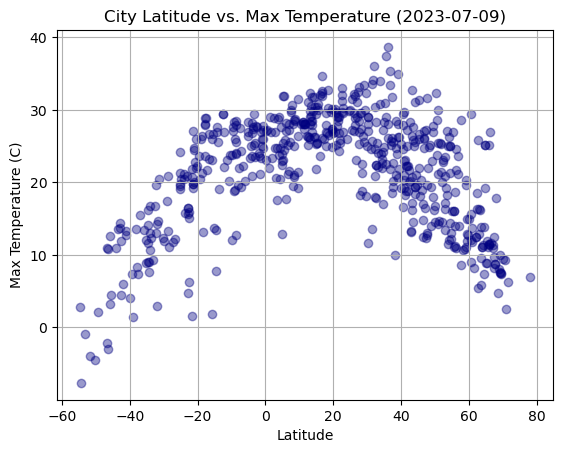

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, color ='navy',alpha = 0.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-09)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

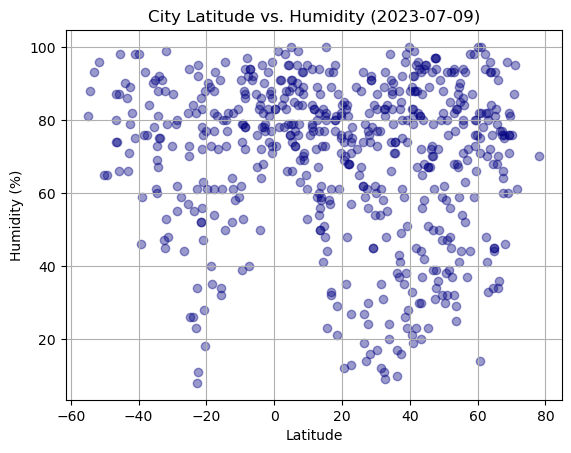

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, color ='navy',alpha = 0.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-09)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

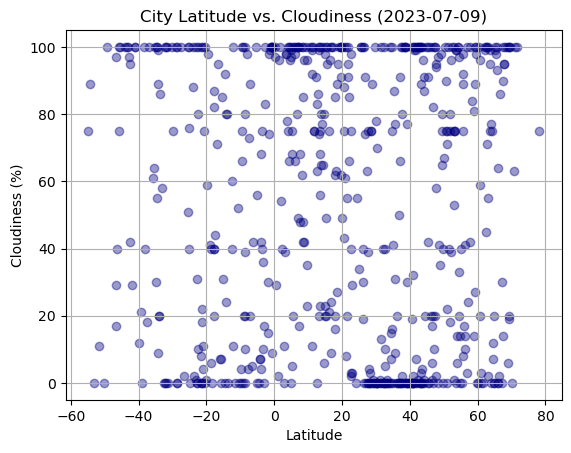

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, color ='navy',alpha = 0.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-09)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

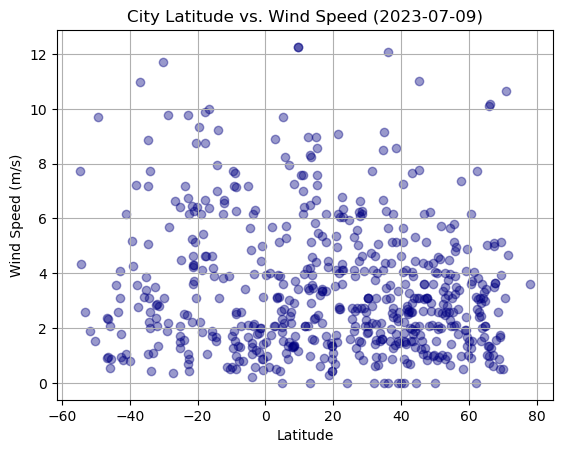

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, color ='navy',alpha = 0.4)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-09)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    plt.scatter(x_values,y_values, color ='navy',alpha = 0.4)
    plt.plot(x_values,regress_values,'r-')
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (0.05,0.15), xycoords='axes fraction', fontsize=15,color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f"The r-value is {rvalue}")
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bandipura,34.4167,74.6500,21.93,66,0,1.59,IN,1688958054
3,prince rupert,54.3161,-130.3201,12.05,87,100,2.57,CA,1688958007
4,fort bragg,35.1390,-79.0060,24.90,90,0,0.00,US,1688958054
7,college,64.8569,-147.8028,25.18,45,0,2.06,US,1688958002
11,conduaga,8.8620,117.4893,28.52,71,42,1.72,PH,1688958056


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luanda,-8.8368,13.2343,19.00,88,20,1.54,AO,1688957641
1,invercargill,-46.4000,168.3500,10.85,74,40,0.96,NZ,1688958054
5,port-aux-francais,-49.3500,70.2167,2.17,65,100,9.70,TF,1688958055
6,papao,-17.7500,-149.5500,28.82,77,87,8.75,PF,1688958055
8,puerto natales,-51.7236,-72.4875,-3.89,96,11,1.90,CL,1688958055


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6453276796808023


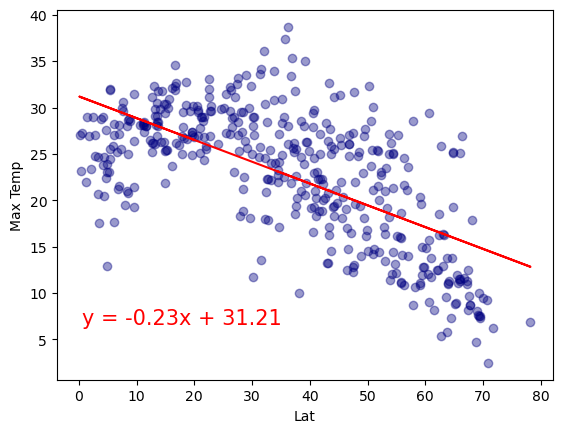

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
x_label = 'Lat'
y_label = 'Max Temp'

create_linear_regression_plot(x_values,y_values)

The r-value is 0.7938609024217583


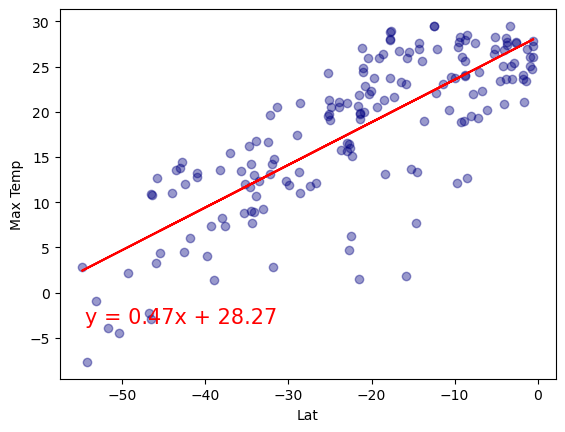

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
x_label = 'Lat'
y_label = 'Max Temp'

create_linear_regression_plot(x_values,y_values)

**Discussion about the linear relationship:** For the Northern Hemisphere, there is a strong inverse relationship between latitude and max temperature (ie. temperature is decreasing as you move further away from the equator). For the Southern Hemisphere, there is a very strong direct relationship between latitude and max temperature (ie. temperature is increasing as you get closer to the equator).

### Humidity vs. Latitude Linear Regression Plot

The r-value is -0.0847343628033755


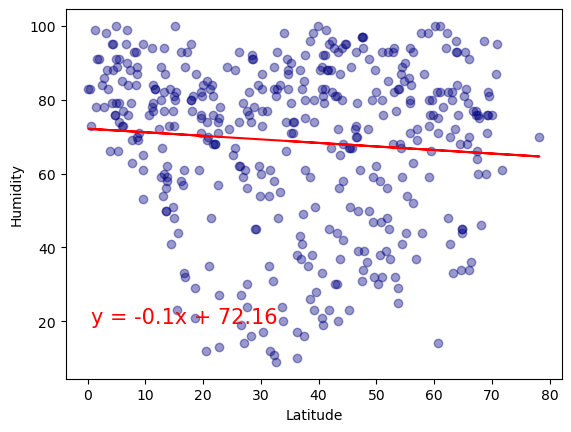

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'

create_linear_regression_plot(x_values,y_values)

The r-value is -0.004195754876332201


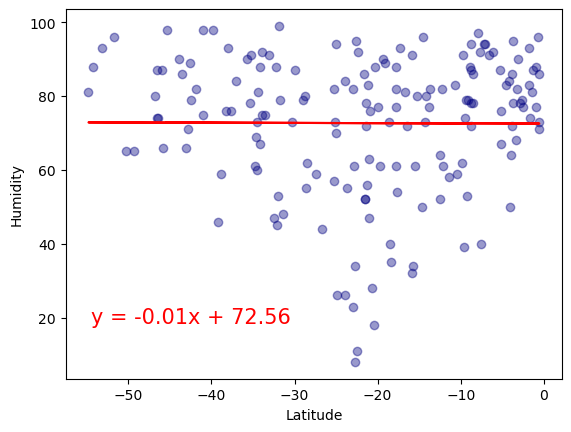

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity'

create_linear_regression_plot(x_values,y_values)

**Discussion about the linear relationship:** The linear regression is modeling a very weak relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.09887320953242722


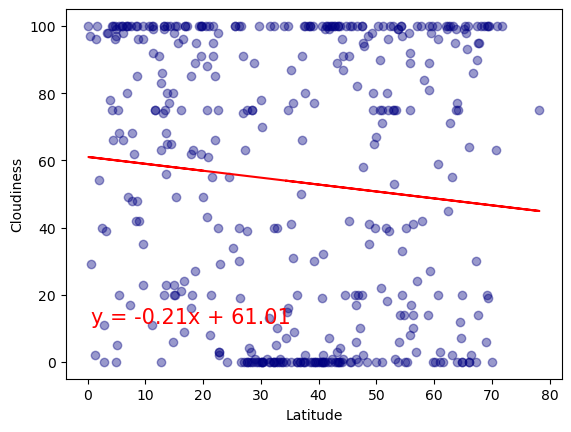

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'

create_linear_regression_plot(x_values,y_values)

The r-value is -0.11645850649051123


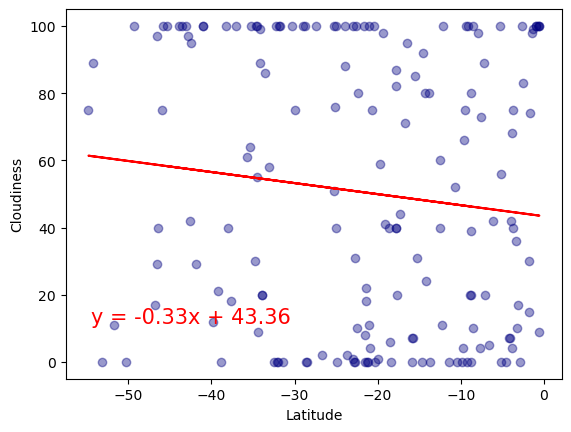

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'

create_linear_regression_plot(x_values,y_values)

**Discussion about the linear relationship:** The linear regression is modeling a very weak relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.12078393370380505


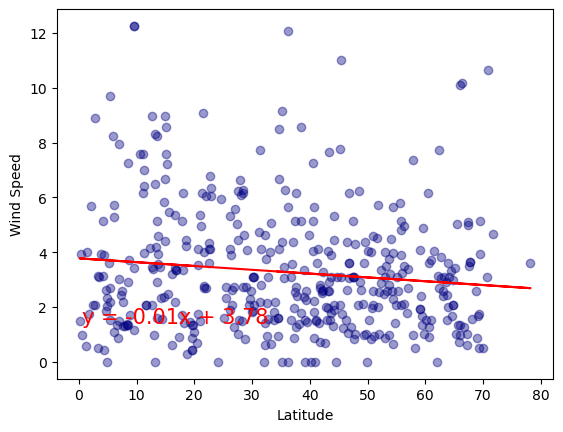

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'

create_linear_regression_plot(x_values,y_values)

The r-value is -0.055177401549995196


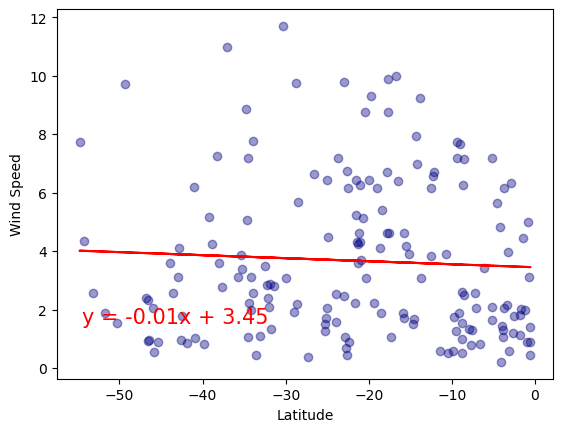

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'

create_linear_regression_plot(x_values,y_values)

**Discussion about the linear relationship:** The linear regression is modeling a very weak relationship between latitude and wind speed.